<a href="https://colab.research.google.com/github/JohnChen97/githubtest/blob/master/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2>Lab 1 - CMPUT 340</h2></center>
<b>Due date:</b> September, 10 at 11:59 pm (submit on eClass). 

In this lab you will learn the basics of Python and Numpy. You should start by reading and executing the code snipets in the following <a href="https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb#scrollTo=0vJLt3JRL9eR">Colab</a>, which was authored by Kevin Zakka, Justin Johnson, Volodymmyr Kuleshov, and Issac Caswell. 

Once you have finished reading and executing the Colab snipets, please read the snipets below and complete the code where needed. After solving the problems and executing your code, please export this Notebook as an html by clicking File -> Downdload as -> HTML (.html) and submit your file to eClass. 

The snipet below creates matrices, A and B, with shape 3, 2 and 2, 4, respectively. The values of the matrices are chosen at random from the interval [0, 1). 

In [1]:
import numpy as np
import time

A = np.random.rand(3, 2)
B = np.random.rand(2, 4)

print('A: ')
print(A)
print('B: ')
print(B)

A: 
[[0.18461583 0.3771752 ]
 [0.5180872  0.79104858]
 [0.03279902 0.87657031]]
B: 
[[0.28707639 0.87888422 0.20980137 0.92872537]
 [0.62046884 0.55944616 0.17541445 0.48252342]]


The following snipet will perform the multiplication of A and B using Numpy's standard implementation. 

In [2]:
C = A.dot(B)
print('C = A x B')
print('C = ')
print(C)

C = A x B
C = 
[[0.28702431 0.37326516 0.10489463 0.35345327]
 [0.6395516  0.89788776 0.24745675 0.8628602 ]
 [0.55330038 0.51922043 0.16064437 0.45342698]]


Finish the implemention of the function multiply_matrices below. 

Certify that the matrix returned by your function matches the result of the operation A.dot(B) from the cell above. 

In [3]:
def multiply_matrices(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        
        for j in range(B.shape[1]):
            for k in range(B.shape[0]):
                # write your code here,
                C[i, j] = C[i, j] + A[i, k] * B[k, j]
            
    return C

C = multiply_matrices(A, B)
print('C = A x B')
print('C = ')
print(C)

C = A x B
C = 
[[0.28702431 0.37326516 0.10489463 0.35345327]
 [0.6395516  0.89788776 0.24745675 0.8628602 ]
 [0.55330038 0.51922043 0.16064437 0.45342698]]


Next, implement a function called <b>multiply_matrices_vectorized</b> that also receives matrices A and B as input and returns C = A x B. Similarly to function multiply_matrices, you can assume that the multiplication is possible for A and B. 

In contrast with function multiply_matrices, your implementation of multiply_matrices_vectorized should contain only two 'for' loops; the innermost 'for' should be replaced by a vectorized implementation where you will use slicing, the operator * for two vectors, and the function sum from Numpy.

In [4]:
def multiply_matrices_vectorized(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    # implement here your vectorized solution
    for i in range(A.shape[0]):
      a = A[i, :]
      for j in range(B.shape[1]):
        b = B[:, j]
        c = a * b
        C[i, j] = sum(c)
    return C

C = multiply_matrices_vectorized(A, B)
print('C = A x B')
print('C = ')
print(C)

C = A x B
C = 
[[0.28702431 0.37326516 0.10489463 0.35345327]
 [0.6395516  0.89788776 0.24745675 0.8628602 ]
 [0.55330038 0.51922043 0.16064437 0.45342698]]


We will use the library 'time' to measure the start and end time of the multiplication. The difference between the end time and start time gives the total running time in seconds of the operation. The snipet below will compare the running time of the different implementations. 

In [5]:
time_start = time.time()
C = A.dot(B)
time_end = time.time()
print('Time function built-in function: %.6f seconds'% (time_end - time_start))

time_start = time.time()
C_ = multiply_matrices(A, B)
time_end = time.time()
print('Time function multiply_matrices: %.6f seconds'% (time_end - time_start))

time_start = time.time()
C__ = multiply_matrices_vectorized(A, B)
time_end = time.time()
print('Time function multiply_matrices_vectorized: %.6f seconds'% (time_end - time_start))

Time function built-in function: 0.000087 seconds
Time function multiply_matrices: 0.000146 seconds
Time function multiply_matrices_vectorized: 0.000474 seconds


Let's increase the size of the matrices to better distinguish the different implementations. We will now use matrices of shape 300x200 and 200x400. 

The built-in implementation should be the fastest because it uses a better algorithm than our naïve implementation. We should also notice a major difference in running time between multiply_matrices and multiply_matrices_vectorized. This is due to the vectorization we performed in the latter. 

The operations with vectors and matrices offered by Numpy are much more efficient than our implementation with a for-loop. That is why, whenever possible, we will prefer to use vectorized implementations of the algorithms in this course. 

In [6]:
A = np.random.rand(300, 200)
B = np.random.rand(200, 400)

time_start = time.time()
C = A.dot(B)
time_end = time.time()
print('Time function built-in function: %.6f seconds'% (time_end - time_start))

time_start = time.time()
C = multiply_matrices(A, B)
time_end = time.time()
print('Time function multiply_matrices: %.6f seconds'% (time_end - time_start))

time_start = time.time()
C = multiply_matrices_vectorized(A, B)
time_end = time.time()
print('Time function multiply_matrices_vectorized: %.6f seconds'% (time_end - time_start))

Time function built-in function: 0.004225 seconds
Time function multiply_matrices: 20.314602 seconds
Time function multiply_matrices_vectorized: 4.779593 seconds


The next snipet creates a set of squared matrices of different sizes. Finish the implementation so that we invoke multiply_matrices and multiply_matrices_vectorized on all pairs of matrices (i.e., we will compute matrices_A[i] * matrices_B[i] for all i). The running time of both functions for all pairs should be stored in the lists time_multiply_matrices and time_multiply_matrices_vectorized. 

Use matplotlib to plot the running time of the two functions for the set of pairs of matrices. The x-axis should be labelled 'Size of the Matrices' and the y-axis should be labelled 'Running Time (seconds)'. Plot one line for each list (time_multiply_matrices and time_multiply_matrices_vectorized). 

1
1
10201
10201
40401
40401
90601
90601
160801
160801


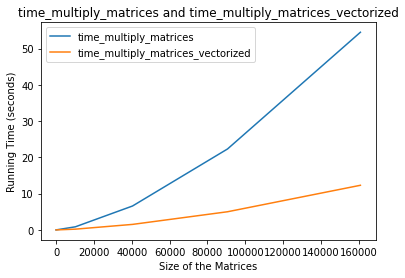

In [7]:
import matplotlib.pyplot as plt
matrices_A = [np.random.rand(i, i) for i in range(1, 500, 100)]
matrices_B = [np.random.rand(i, i) for i in range(1, 500, 100)]

time_multiply_matrices = []
time_multiply_matrices_vectorized = []
size_A = []
size_B = []
# complete implementation
start_time = time.time()

for i in range(len(matrices_A)):
  size_A.append(matrices_A[i].shape[0] * matrices_A[i].shape[1])
  print(matrices_A[i].shape[0] * matrices_A[i].shape[1])
  size_B.append(matrices_B[i].shape[0] * matrices_B[i].shape[1])
  print(matrices_B[i].shape[0] * matrices_B[i].shape[1])
  start_time = time.time()
  C = multiply_matrices(matrices_A[i], matrices_B[i])
  end_time = time.time()
  time_multiply_matrices.append(end_time - start_time)
  start_time = time.time()
  C = multiply_matrices_vectorized(matrices_A[i], matrices_B[i])
  end_time = time.time()
  time_multiply_matrices_vectorized.append(end_time - start_time)
plt.plot(size_A, time_multiply_matrices)
plt.plot(size_B, time_multiply_matrices_vectorized)
plt.xlabel('Size of the Matrices')
plt.ylabel('Running Time (seconds)')
plt.title('time_multiply_matrices and time_multiply_matrices_vectorized')
plt.legend(['time_multiply_matrices', 'time_multiply_matrices_vectorized'])

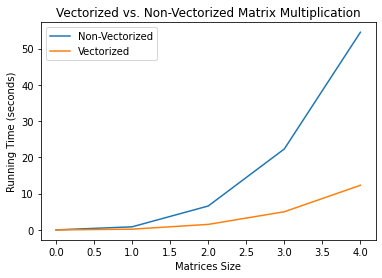

In [8]:
import matplotlib.pyplot as plt

plt.plot(time_multiply_matrices)
plt.plot(time_multiply_matrices_vectorized)
plt.xlabel('Matrices Size')
plt.ylabel('Running Time (seconds)')
plt.title('Vectorized vs. Non-Vectorized Matrix Multiplication')
plt.legend(['Non-Vectorized', 'Vectorized'])